## Canadian Forest Fire Prediction

# Life cycle of Machine learning Project
- Understanding the Problem Statement
- Data Collection
- Data Checks & Discovery
- Exploratory Data Analysis (EDA)
- Data Pre-Processing
- Model Training
- Choose best model


1) Problem statement
    The task is to predict the risk of forest fires in various provinces of Canada based on environmental and geographical factors. The problem is a multi-class classification problem where the target variable has four categories: No Fire, Low Risk, Medium Risk, and High Risk. The goal is to develop a machine learning model that can accurately classify the fire risk level given the feature inputs.

2) Use Case:
- Resource allocation for firefighting efforts.
- Implementing precautionary measures during high-risk periods.

3) Data Collection:
The data consists of 9 column and 1000 rows.

Import Libraries

In [13]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt 
import seaborn as sns 

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

Import dataset

In [15]:
df = pd.read_csv("../data/raw/dataset.csv")

Top 5 rows

In [27]:
df.head(5)

,Province,Temperature,Oxygen,Humidity,Vegetation_Type,Drought_Index,Fire_Seasonality,Land_Use,Target
0,New Brunswick,NaN,19.591444,NaN,Grassland,272.801193,NaN,Industrial,No Fire
1,NaN,10.180076,19.147137,84.011601,Forest,716.714059,Summer,Agricultural,No Fire
2,Ontario,28.640759,19.011429,96.870673,Wetland,105.972024,Spring,Agricultural,No Fire
3,Alberta,31.265827,19.939055,65.530465,Wetland,515.947829,Winter,NaN,NaN
4,Newfoundland and Labrador,26.867228,20.793730,52.137220,Grassland,454.735284,Fall,Commercial,No Fire


Data shape

In [20]:
#data shape
print(f"Data shape is: {df.shape}")
print(f"Data has {df.shape[1]} columns & {df.shape[0]} rows")

Data shape is: (1000, 9)
Data has 9 columns & 1000 rows


In [22]:
# Check for missing data
df.isnull().sum()

Province            100
Temperature         100
Oxygen              100
Humidity            100
Vegetation_Type     100
Drought_Index       100
Fire_Seasonality    100
Land_Use            100
Target              100
dtype: int64

## Dataset Description

The dataset consists of the following features:

- Province: The Canadian province where the data was recorded. (Categorical)
- Temperature: The ambient temperature in degrees Celsius. (Numerical)
- Oxygen: The oxygen concentration in the air in percentage. (Numerical)
- Humidity: The relative humidity in percentage. (Numerical)
- Vegetation_Type: The type of vegetation in the area. (Categorical)
- Drought_Index: The drought index, which is a measure of dryness, where higher values indicate more severe drought. (Numerical)
- Fire_Seasonality: The season during which the data was recorded. (Categorical)
- Land_Use: The type of land use in the area. (Categorical)
- Target: The risk level of forest fire. (Categorical)


## Data Checks to perform
- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

Check Missing values

In [29]:
df.isnull().sum()

Province            100
Temperature         100
Oxygen              100
Humidity            100
Vegetation_Type     100
Drought_Index       100
Fire_Seasonality    100
Land_Use            100
Target              100
dtype: int64

Check Duplicates

In [31]:
df.duplicated().sum()

np.int64(0)

Check Data Types

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Province          900 non-null    object 
 1   Temperature       900 non-null    float64
 2   Oxygen            900 non-null    float64
 3   Humidity          900 non-null    float64
 4   Vegetation_Type   900 non-null    object 
 5   Drought_Index     900 non-null    float64
 6   Fire_Seasonality  900 non-null    object 
 7   Land_Use          900 non-null    object 
 8   Target            900 non-null    object 
dtypes: float64(4), object(5)
memory usage: 70.4+ KB


Checking the number of unique values of each column

In [36]:
df.nunique()

Province             10
Temperature         900
Oxygen              900
Humidity            900
Vegetation_Type       4
Drought_Index       900
Fire_Seasonality      4
Land_Use              4
Target                4
dtype: int64

Check Data Stats

In [37]:
df.describe()

,Temperature,Oxygen,Humidity,Drought_Index
count,900.000000,900.000000,900.000000,900.000000
mean,13.086205,20.005113,55.030339,384.147558
std,13.291244,0.582894,25.911552,231.640499
min,-9.964404,19.002877,10.001608,0.100899
25%,1.629754,19.508331,32.403679,176.785506
50%,13.454917,19.983453,55.927007,388.845989
75%,24.364836,20.518601,77.446724,581.435487
max,34.977604,20.996268,99.986420,799.817223


Exploring Data

Identifying Categorical & Numerical Columns 

In [99]:
cat_columns = [col for col in df.columns if df[col].dtype == "O" and col != "Target"]
num_columns = [col for col in df.columns if df[col].dtype != "O"]

Exploring Categorical Columns

In [100]:
df[cat_columns].describe()

,Province,Vegetation_Type,Fire_Seasonality,Land_Use
count,900,900,900,900
unique,10,4,4,4
top,Saskatchewan,Forest,Fall,Industrial
freq,109,250,237,246


Exploringeach Categorical Column

In [101]:
for col in df[cat_columns]:
    print(f"Unique values in {col} column are: \n {df[col].unique()}")
    print("\n")
    print(df[col].value_counts())
    print("*" * 100)

Unique values in Province column are: 
 ['New Brunswick' nan 'Ontario' 'Alberta' 'Newfoundland and Labrador'
 'Quebec' 'British Columbia' 'Nova Scotia' 'Manitoba' 'Saskatchewan'
 'Prince Edward Island']


Province
Saskatchewan                 109
Alberta                       95
Ontario                       93
Prince Edward Island          92
Nova Scotia                   91
Newfoundland and Labrador     90
Manitoba                      88
Quebec                        83
British Columbia              81
New Brunswick                 78
Name: count, dtype: int64
****************************************************************************************************
Unique values in Vegetation_Type column are: 
 ['Grassland' 'Forest' 'Wetland' 'Shrubland' nan]


Vegetation_Type
Forest       250
Shrubland    230
Grassland    224
Wetland      196
Name: count, dtype: int64
****************************************************************************************************
Unique values in Fir

Exploring the target column

In [129]:
df["Target"].value_counts()

Target
No Fire        361
Low Risk       196
Medium Risk    188
High Risk      155
Name: count, dtype: int64

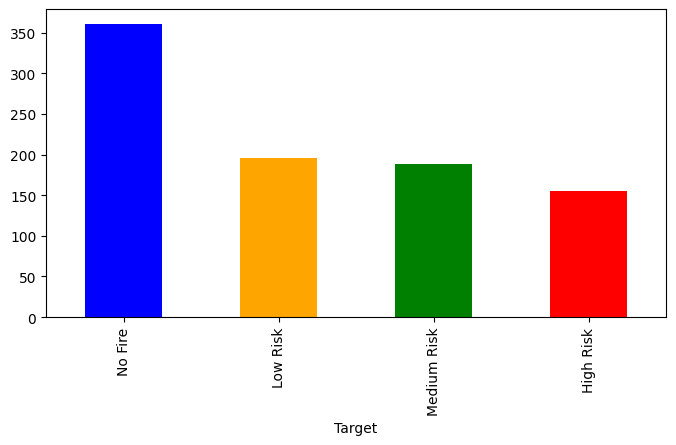

In [128]:
colors = ['blue', 'orange', 'green', 'red']
plt.figure(figsize=(8,4))
df["Target"].value_counts().plot(kind="bar", color= colors)
plt.show()

MUTIVARIATE ANALYSIS USING PAIRPLOT

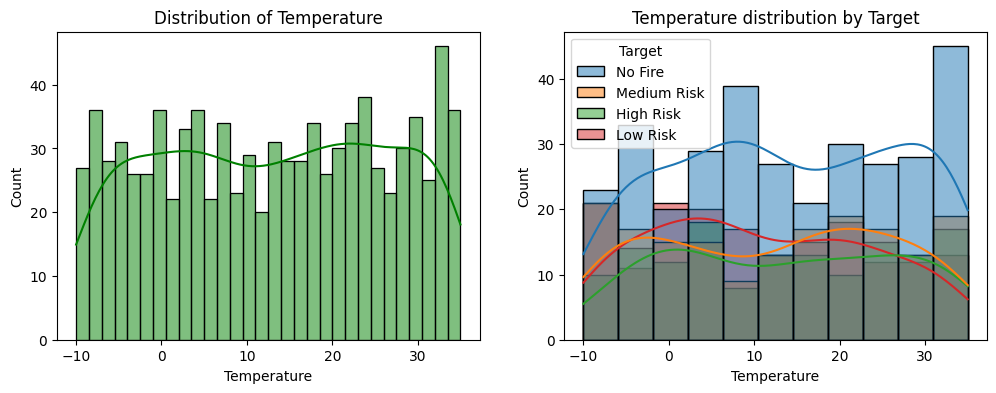

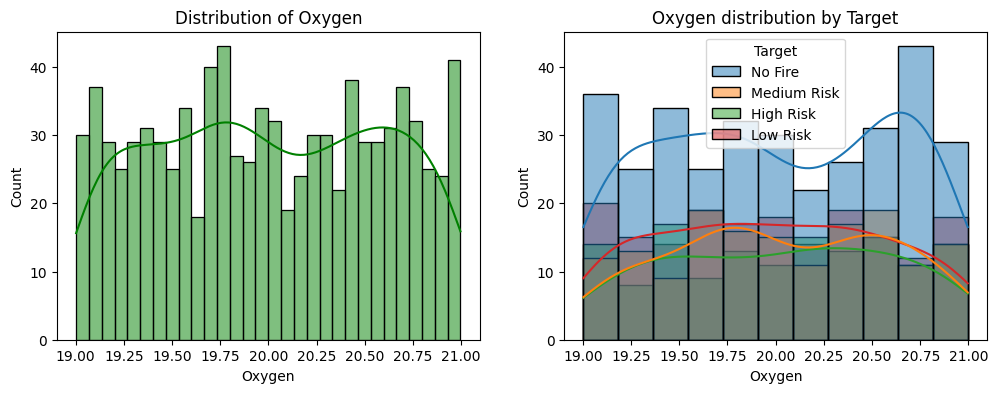

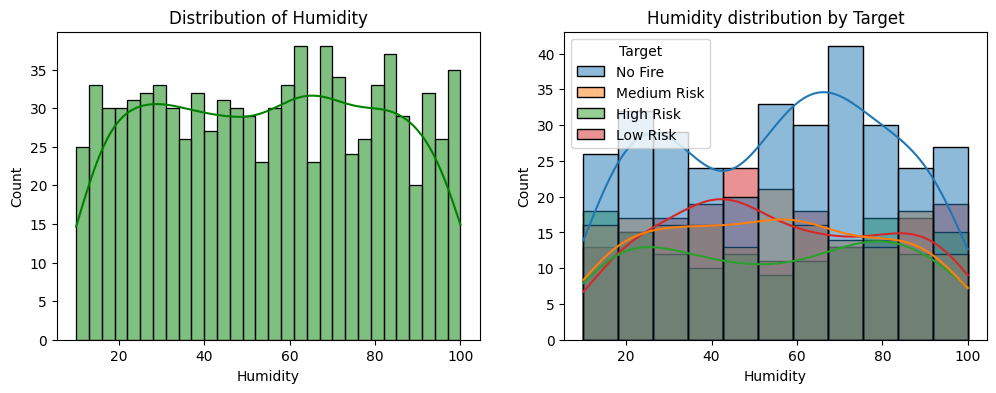

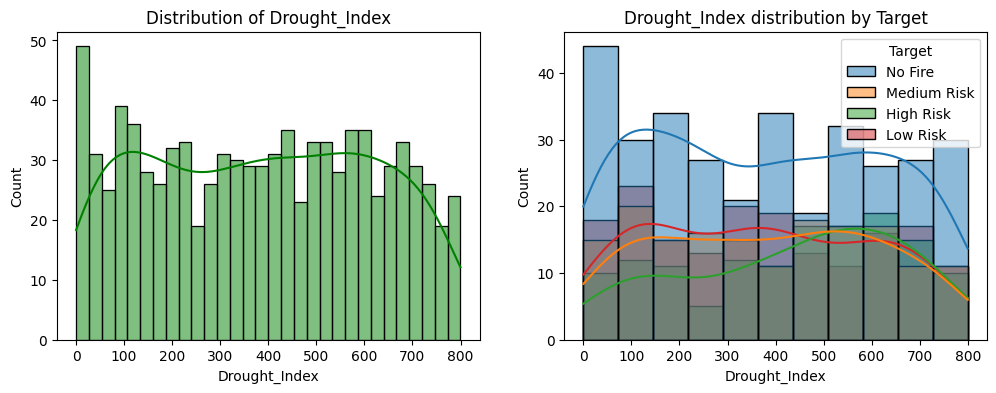

In [102]:
for col in num_columns:
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))
    plt.subplot(121)
    sns.histplot(data=df,x=col,bins=30,kde=True,color='g')
    plt.subplot(122)
    sns.histplot(data=df,x=col,kde=True,hue='Target')
    axs[0].set_title(f'Distribution of {col}')
    axs[1].set_title(f'{col} distribution by Target')
    plt.show()

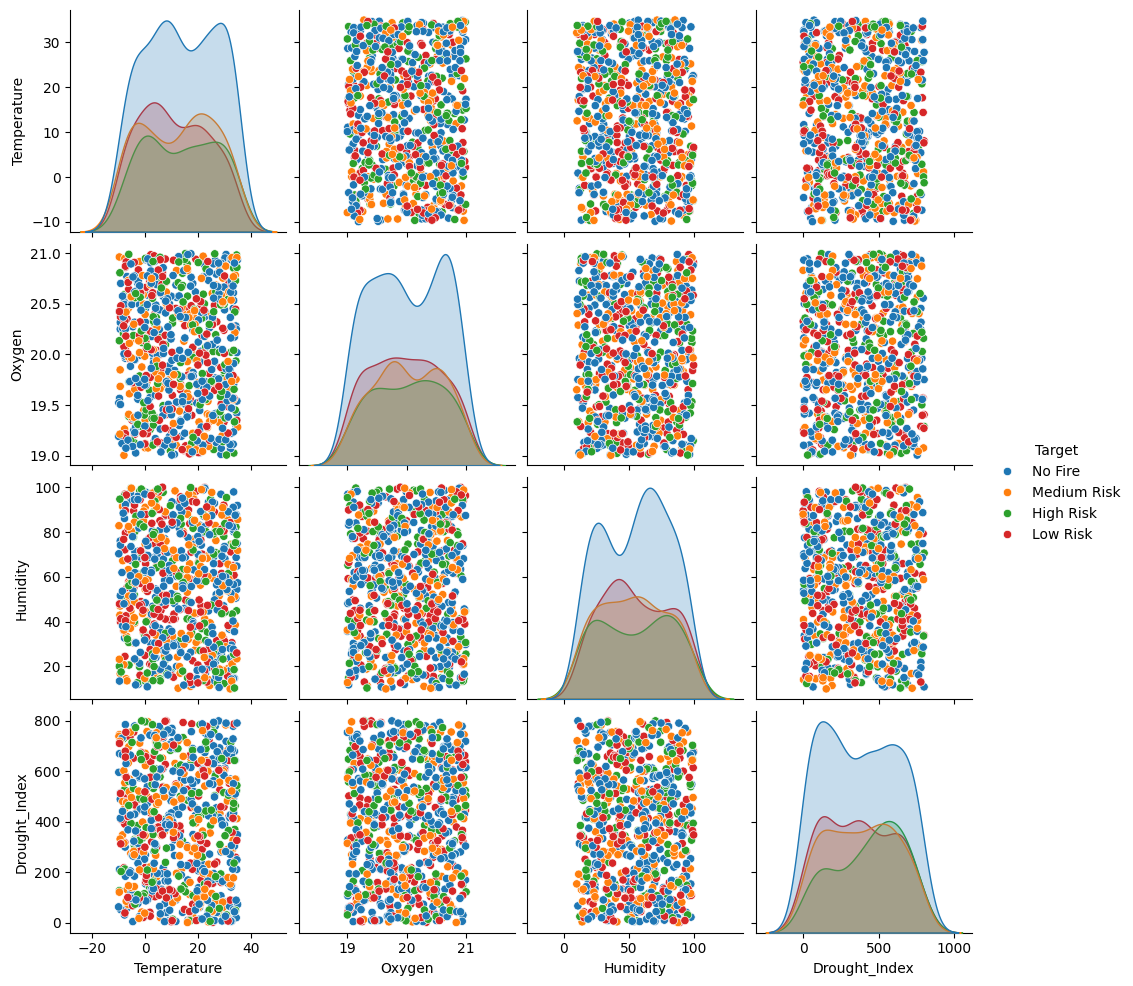

In [103]:
sns.pairplot(df[num_columns + ["Target"]], hue= "Target")
plt.show()